# *Recurrent Neural Networks* (RNNs)

<p align=”justify”>Berbeda dengan pemrosesan data statis yang dapat dilakukan dengan cara relatif sederhana, seperti menggunakan <i>feed-forward multi-layer neural networks</i> seperti yang telah saya jelaskan pada bagian sebelumnya, data sikuensial yang mempunyai perioditas seperti data gelombang dan <i>time-series</i>, membutuhkan arsitektur algoritma ANN yang lebih kompleks untuk analisis dan prediksinya. <i>Recurrent Neural Networks</i> (RNNs) merupakan salah satu algoritma yang paling cocok untuk menganalisis dan memprediksi data sikuensial ini. Konsep RNNs sendiri pertamakali dicetuskan oleh Jeffrey L. Elman (guru besar psikolinguistik dari UC San Diego) untuk mendefinisikan perilaku manusia seturut waktu (Elman, 1990). Pada bagian ini saya akan secara singkat membahas penggunaan algoritma RNNs sederhana, yakni jaringan Elman guna memprediksi gelombang sinus. Sekali lagi saya ingatkan tujuan tutorial ini bukan untuk meninjau konsep matematis di balik suatu algoritma, melainkan untuk memperkenalkan pustaka NeuroLab sebagai alternatif NNT pada MATLAB<sup>®</sup> bagi pembaca yang berminat untuk mengetahui konsep jaringan Elman secara lebih mendalam disarankan untuk membaca buku Goodfellow, dkk.(2016) di bab 10. </p>

Seperti biasa untuk mengawali pembahasan, kita harus mengimpor beberapa pustaka sebagai berikut:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
plt.xkcd() # biar lucu
plt.style.use('ggplot') # karena saya pengguna R juga biar bagus, Bro plotnya!
%matplotlib inline

Kemudian saya akan mendefinisikan gelombang sinus melalui fungsi sebagai berikut:

In [2]:
# pendefinisian gelombang sinus
def dapat_data(jum_titik):
    g1 = 0.6 * np.sin(np.arange(0, jum_titik))
    g2 = 3.5 * np.sin(np.arange(0, jum_titik))
    g3 = 1.2 * np.sin(np.arange(0, jum_titik))
    g4 = 4.6 * np.sin(np.arange(0, jum_titik))
    
    a1 = np.ones(jum_titik)
    a2 = 2.2 + np.zeros(jum_titik)
    a3 = 3.1 * np.ones(jum_titik)
    a4 = 0.9 + np.zeros(jum_titik)
    
    gelombang = np.array([g1, g2, g3, g4]).reshape(jum_titik*4,1)
    amplitudo = np.array([a1, a2, a3, a4]).reshape(jum_titik*4,1)
    
    return gelombang, amplitudo

def visualisasi_output(nn, jum_titik_test):
    gelombang, amplitudo = dapat_data(jum_titik_test)
    output = nn.sim(gelombang)
    plt.plot(amplitudo.reshape(jum_titik_test*4));
    plt.plot(output.reshape(jum_titik_test*4));
    
if __name__ == '__main__':
    jum_titik = 100
    gelombang, amplitudo = dapat_data(jum_titik)

<p align=”justify”>Untuk membangun model jaringan Elman, kita akan menggunakan fungsi <a href="https://pythonhosted.org/neurolab/ex_newelm.html"><code>newelm</code></a> dengan menggunakan dua buah fungsi aktifasi, yakni tangen hiperbolik dan linear. Jaringan Elman yang kita buat mempunyai dua lapisan, dengan jumlah perseptron 10 dan 1 pada masing -masing lapisannya. Nilai minimum <i>input</i>pada model yang hendak kita definisikan ini -2, dan nilai maksimumnya 2:</p>

In [3]:
nn = nl.net.newelm([[-2,2]], [10,1], [nl.trans.TanSig(), nl.trans.PureLin()])

Kemudian kita dapat melakukan inisialisasi untuk setiap lapisan:

In [4]:
# inisilasi fungsi untuk setiap layer
nn.layers[0].initf = nl.init.InitRand([-.1, .1], 'wb')
nn.layers[1].initf = nl.init.InitRand([-.1, .1], 'wb')

# inisialisasi jaringan
nn.init()

Akhirnya, kita akan melakukan proses *training* dan memprediksi hasilnya untuk rentang nilai yang berbeda - beda:

Epoch: 100; Error: 0.7809027428654477;
Epoch: 200; Error: 0.7785035401147178;
Epoch: 300; Error: 1.633428314200924;
Epoch: 400; Error: 0.6145588977164175;
Epoch: 500; Error: 0.5386097096074547;
Epoch: 600; Error: 0.37709956397992783;
Epoch: 700; Error: 0.16467789201306526;
Epoch: 800; Error: 0.10690896359139807;
Epoch: 900; Error: 0.08083894917612586;
Epoch: 1000; Error: 0.051530213900422;
Epoch: 1100; Error: 0.03796643393451813;
Epoch: 1200; Error: 0.37738746049418964;
Epoch: 1300; Error: 0.03723070604995019;
Epoch: 1400; Error: 0.05815950944243982;
Epoch: 1500; Error: 0.22031050422267867;
Epoch: 1600; Error: 0.5646618966289843;
Epoch: 1700; Error: 0.03495293049507858;
Epoch: 1800; Error: 0.09541297474706446;
Epoch: 1900; Error: 0.03365429491627447;
Epoch: 2000; Error: 0.033974527266889015;
The maximum number of train epochs is reached


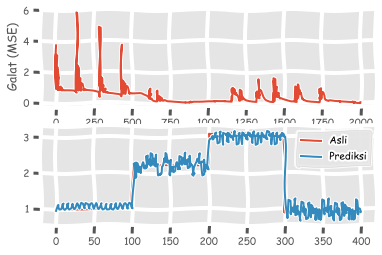

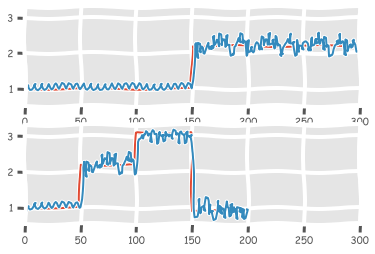

In [5]:
progres_galat = nn.train(gelombang, amplitudo, epochs=2000, show=100, goal=.01)

output = nn.sim(gelombang)

plt.subplot(211);
plt.plot(progres_galat);
plt.xlabel('Jumlah epochs');
plt.ylabel('Galat (MSE)');

plt.subplot(212)
plt.plot(amplitudo.reshape(jum_titik*4))
plt.plot(output.reshape(jum_titik*4))
plt.legend(['Asli', 'Prediksi'])

plt.figure();
plt.subplot(211);
visualisasi_output(nn, 150); # untuk bilangan acak di atas training
plt.xlim([0, 300]);

plt.subplot(212);
visualisasi_output(nn, 50); # untuk bilangan acak di bawah training
plt.xlim([0, 300]);